ibmqfactory.load_account:WARNING:2022-06-13 22:07:15,991: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


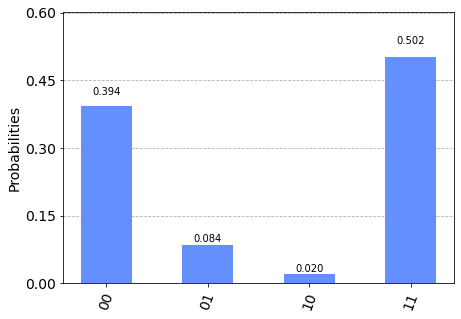

In [20]:
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import *
import matplotlib

IBMQ.delete_account()
IBMQ.save_account('YOUR API KEY')
# Loading your IBM Q account(s)
IBMQ.load_account()

num_qubits = 2

# Obtenemos el provider
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

# Obtenemos un system backend
backend = provider.get_backend('ibmq_santiago')

# Crear un circuito cuántico actuando sobre el registro q, para este caso solo emplearemos 2 QuantumRegister y 2 ClassicalRegister
#los cuales se pueden definir solo con QuantumCircuit
circuit = QuantumCircuit(2, 2)

# Añade una puerta H en el qubit 0
circuit.h(0)

# Añade una puerta CX (CNOT) en el qubit de control
# qubit 0 y objetivo qubit 1
circuit.cx(0, 1)

# Asignar la medición cuántica a los bits clásicos
circuit.measure([0,1], [0,1])

# Ejecutar el circuito en un trabajo
job = execute(circuit, backend=backend)

# Obtenemos el estado del trabajo
job.status()

# Monitorizamos el job
job_monitor(job)

# Obtenemos el resultado
result = job.result()

# Dibuja el circuito
print(circuit)

# Devuelve los recuentos
plot_histogram(result.get_counts(circuit))